In [1]:
import os
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.io as pio
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker


# Construct the relative file path
file_path = os.path.join('..', '..', 'Output', 'Simulation', 'quadcopterFeasability.csv')
data = pd.read_csv(file_path)


View data

In [3]:
data

,subplots,mean_n,area,trueDensity,CV,NSubplots,Abundance,Overlap,area_p
0,16.0,14.0,128.0,109.375,0.087,16,10,0,0.22
1,16.0,27.0,128.0,218.750,0.066,16,20,0,0.22
2,16.0,43.0,128.0,343.750,0.045,16,30,0,0.22
3,16.0,61.0,128.0,484.375,0.035,16,40,0,0.22
4,16.0,6.0,128.0,46.875,0.241,16,5,0,0.22
...,...,...,...,...,...,...,...,...,...
195,9.0,9.0,36.0,361.111,0.952,9,50,gimbal,0.06
196,9.0,12.0,36.0,500.000,0.530,9,60,gimbal,0.06
197,9.0,18.0,36.0,750.000,0.363,9,70,gimbal,0.06
198,9.0,14.0,36.0,583.333,0.746,9,80,gimbal,0.06


In [2]:

# Define a mapping from unique entries to values
mapping = {
    65: 1,
    '65': 1,
    10: 2,
    '10': 2,
    0: 3,
    '0': 3,
    200: 4,
    '200': 4,
    'gimbal': 5
}

# Assign categorical values based on the mapping
data['Overlap_cat'] = data['Overlap'].map(mapping)

print(data)

     subplots  mean_n   area  trueDensity     CV  NSubplots  Abundance  \
0        16.0    14.0  128.0      109.375  0.087         16         10   
1        16.0    27.0  128.0      218.750  0.066         16         20   
2        16.0    43.0  128.0      343.750  0.045         16         30   
3        16.0    61.0  128.0      484.375  0.035         16         40   
4        16.0     6.0  128.0       46.875  0.241         16          5   
..        ...     ...    ...          ...    ...        ...        ...   
195       9.0     9.0   36.0      361.111  0.952          9         50   
196       9.0    12.0   36.0      500.000  0.530          9         60   
197       9.0    18.0   36.0      750.000  0.363          9         70   
198       9.0    14.0   36.0      583.333  0.746          9         80   
199       9.0    30.0   36.0     1222.222  0.317          9         90   

    Overlap  area_p  Overlap_cat  
0         0    0.22            3  
1         0    0.22            3  
2     

C:\Users\lhambrec\AppData\Local\Temp\ipykernel_6708\3733035452.py:26: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  sc_x = ax.scatter(


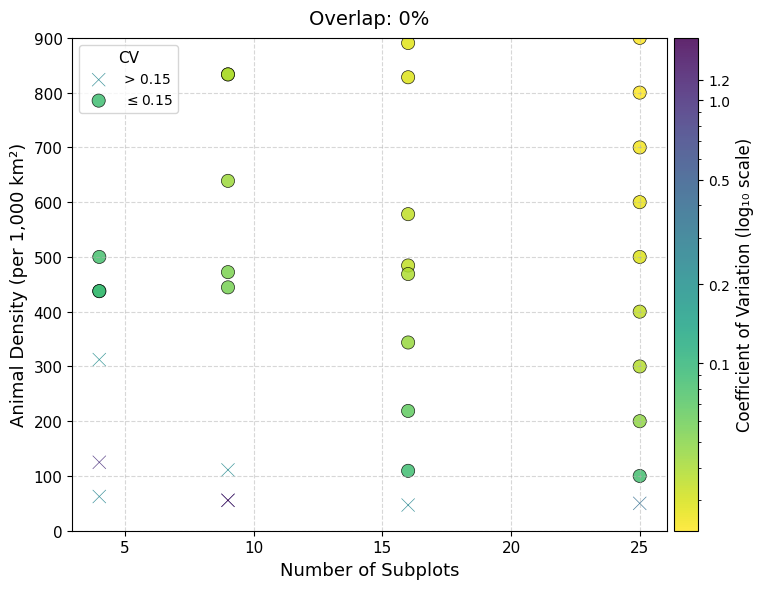

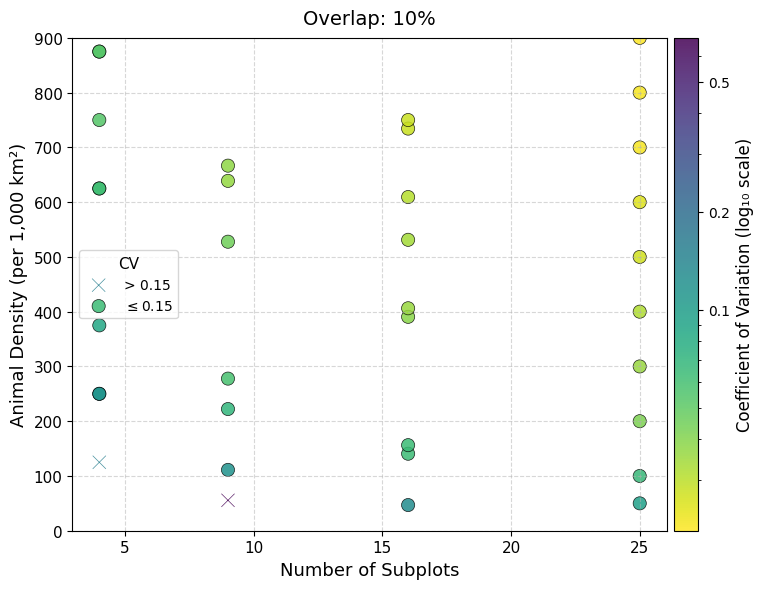

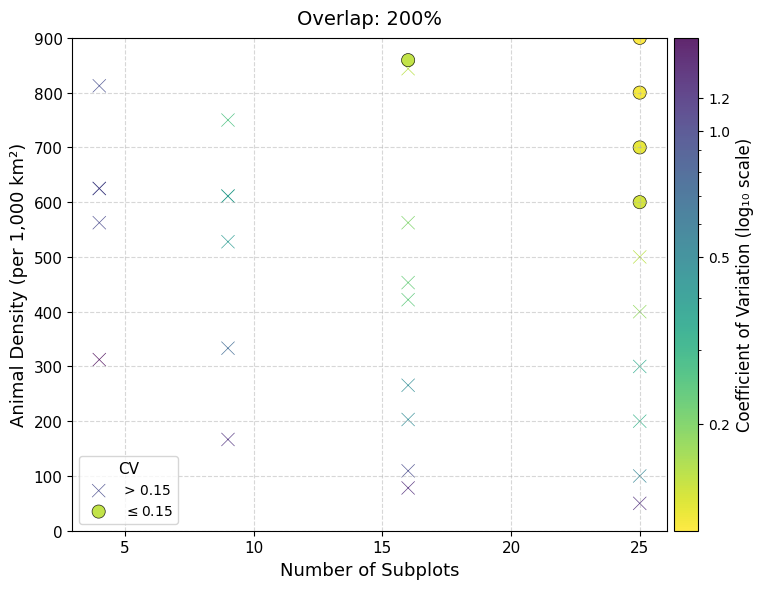

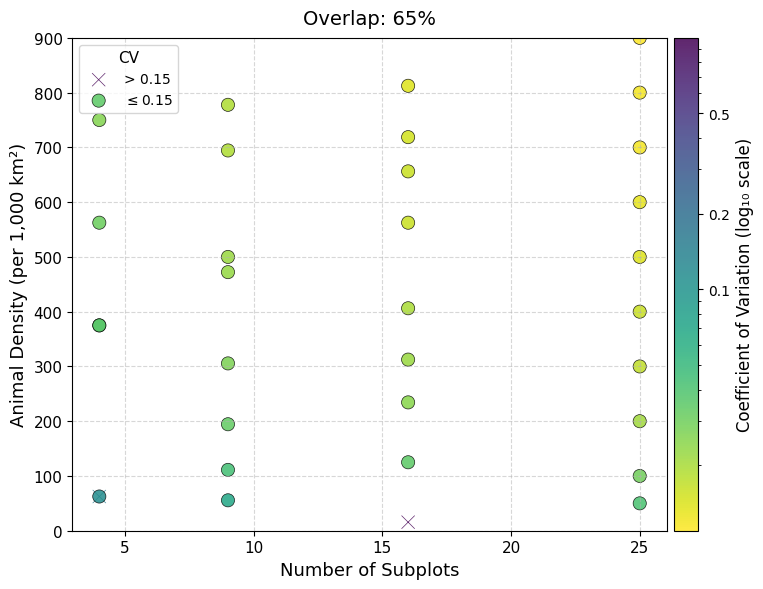

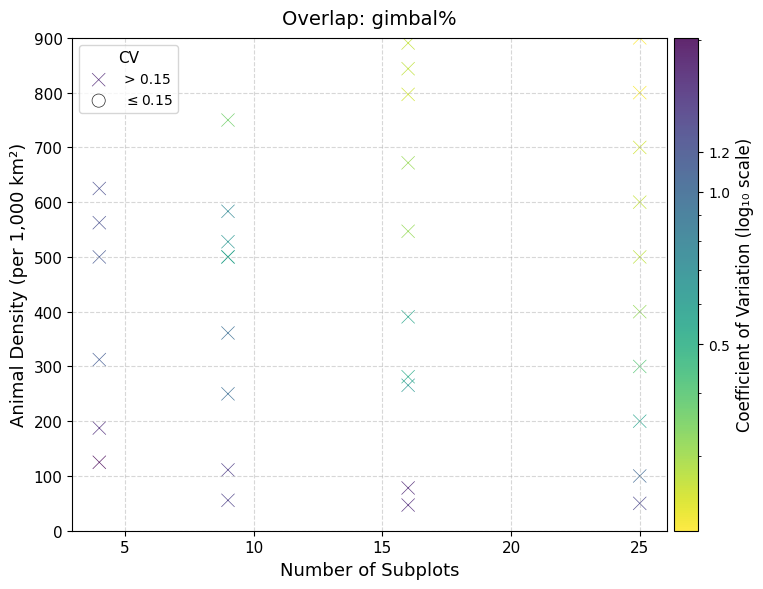

In [6]:
# Get unique overlap values
overlap_values = data['Overlap'].unique()

# Create a figure for each overlap value
for overlap in overlap_values:
    # Filter data for current overlap
    overlap_data = data[data['Overlap'] == overlap]
    
    fig, ax = plt.subplots(figsize=(8, 6))

    # Masks for CV groups
    mask_x = overlap_data['CV'] > 0.15
    mask_circle = overlap_data['CV'] <= 0.15

    # Use a colorblind-friendly colormap
    cmap = plt.get_cmap('viridis_r')
    norm = mpl.colors.LogNorm(vmin=overlap_data['CV'].min()+1e-6, vmax=overlap_data['CV'].max())

    # Format x-axis ticks as integers
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x)}"))
    ax.set_xlabel("Number of Subplots", fontsize=13)
    # ax.annotate('%', xy=(0.96, -0.015), xycoords='axes fraction',
        # fontsize=12, ha='left', va='top')

    # Plot each group with different marker
    sc_x = ax.scatter(
        overlap_data.loc[mask_x, 'NSubplots'],
        overlap_data.loc[mask_x, 'trueDensity'],
        c=overlap_data.loc[mask_x, 'CV'],
        cmap=cmap,
        norm=norm,
        marker='x',
        s=90,
        alpha=0.85,
        edgecolor='k',
        linewidth=0.5,
        label='> 0.15'
    )
    sc_circle = ax.scatter(
        overlap_data.loc[mask_circle, 'NSubplots'],
        overlap_data.loc[mask_circle, 'trueDensity'],
        c=overlap_data.loc[mask_circle, 'CV'],
        cmap=cmap,
        norm=norm,
        marker='o',
        s=90,
        alpha=0.85,
        edgecolor='k',
        linewidth=0.5,
        label=r'$\leq 0.15$'
    )

    # Labels and formatting
    ax.set_ylabel('Animal Density (per 1,000 km²)', fontsize=13)
    ax.tick_params(axis='both', which='major', labelsize=11)
    ax.grid(True, linestyle='--', alpha=0.5)
    
    # Set y-axis limits
    ax.set_ylim(0, 900)  # Set the y-axis range from 0 to 900
    
    # Add title showing overlap value
    ax.set_title(f'Overlap: {overlap}%', fontsize=14, pad=10)

    # Colorbar
    ticks = [0.1, 0.2, 0.5, 1.0, 1.2]
    ticks = [t for t in ticks if overlap_data['CV'].min() <= t <= overlap_data['CV'].max()]
    cbar = fig.colorbar(sc_circle, ax=ax, ticks=ticks, pad=0.01)
    cbar.set_label('Coefficient of Variation (log₁₀ scale)', fontsize=12)
    cbar.ax.tick_params(labelsize=10)
    cbar.ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
    cbar.ax.yaxis.set_minor_formatter(ticker.NullFormatter())

    ax.legend(title='CV', fontsize=10, title_fontsize=11)

    plt.tight_layout()
    
    # Save each figure with overlap value in filename
    plt.savefig(os.path.join('..', '..', 'Output', 'Plots', f'quadcopterFeasability_plot_2D_CV_overlap{overlap}.png'), dpi=300)
    plt.show()

C:\Users\lhambrec\AppData\Local\Temp\ipykernel_6708\3011716244.py:28: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  sc_x = ax.scatter(
C:\Users\lhambrec\AppData\Local\Temp\ipykernel_6708\3011716244.py:28: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  sc_x = ax.scatter(
C:\Users\lhambrec\AppData\Local\Temp\ipykernel_6708\3011716244.py:28: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  sc_x = ax.scatter(
C:\Users\lhambrec\AppData\Local\Temp\ipykernel_6708\3011716244.py:28: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplo

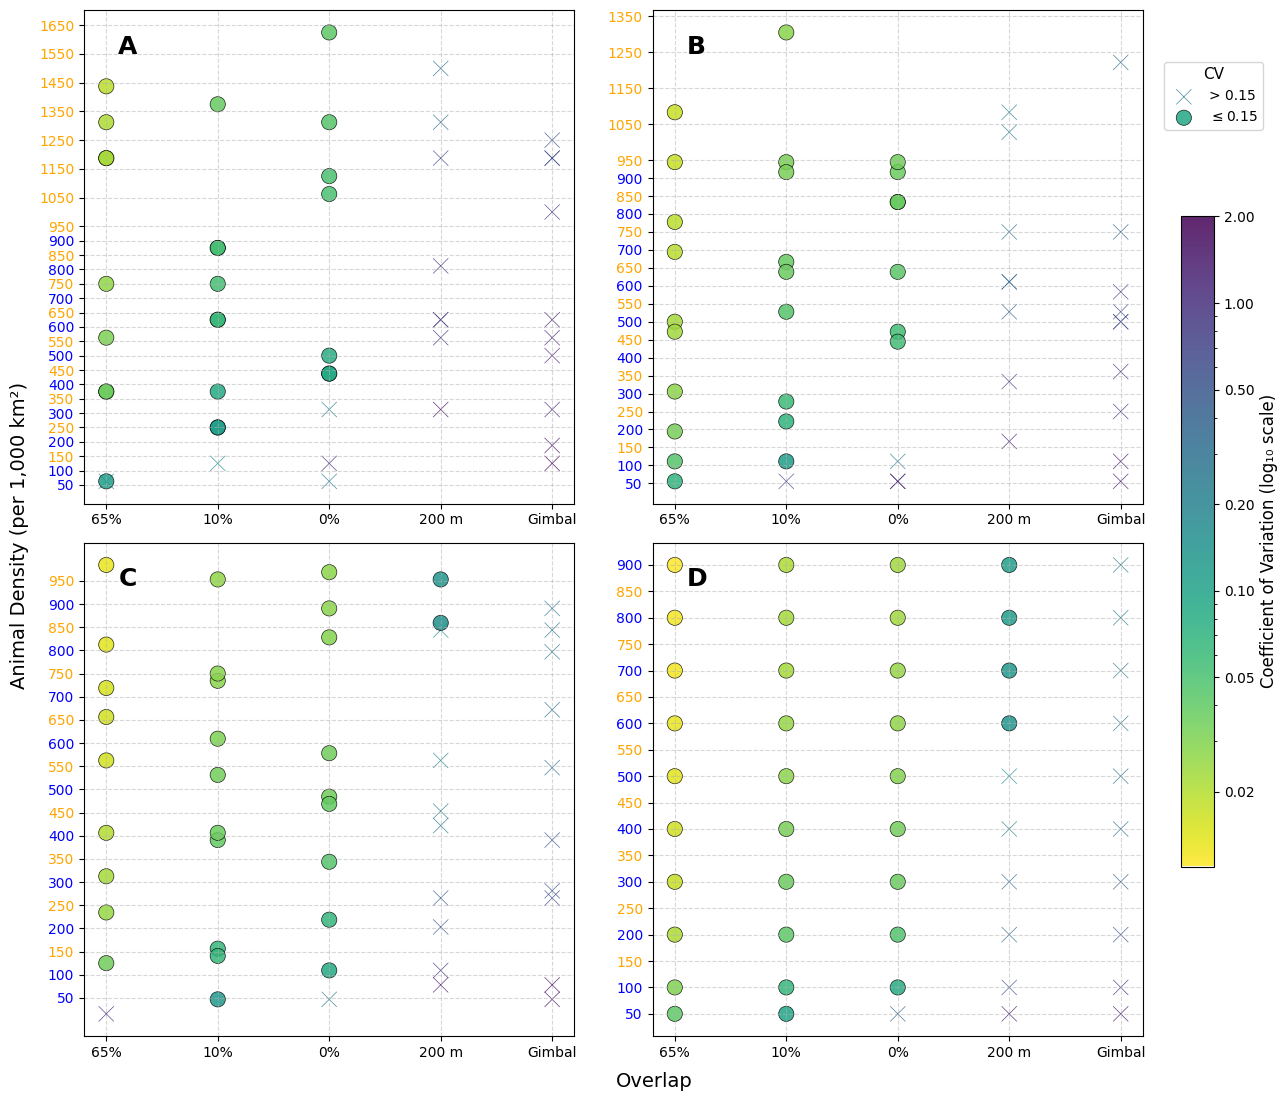

In [ ]:
sorted_data = data.sort_values(by='NSubplots')
unique_nsubplots = sorted_data['NSubplots'].unique()[:4]  # Use first 4 for 2x2 layout

label_mapping = {
    1: '65%',
    2: '10%',
    3: '0%',
    4: '200 m',
    5: 'Gimbal'
}

fig, axs = plt.subplots(2, 2, figsize=(14, 12))
axs = axs.flatten()

cmap = plt.get_cmap('viridis_r')
norm = mpl.colors.LogNorm(vmin=sorted_data['CV'].min()+1e-6, vmax=sorted_data['CV'].max())

subplot_labels = ['A', 'B', 'C', 'D']
blue_ticks = [50, 100, 200, 300, 400, 500, 600, 700, 800, 900]

for i, nsub in enumerate(unique_nsubplots):
    ax = axs[i]
    subset = sorted_data[sorted_data['NSubplots'] == nsub]

    mask_x = subset['CV'] > 0.15
    mask_circle = subset['CV'] <= 0.15

    sc_x = ax.scatter(
        subset.loc[mask_x, 'Overlap_cat'],
        subset.loc[mask_x, 'trueDensity'],
        c=subset.loc[mask_x, 'CV'],
        cmap=cmap,
        norm=norm,
        marker='x',
        s=120,
        alpha=0.85,
        edgecolor='k',
        linewidth=0.5,
        label='> 0.15'
    )
    sc_circle = ax.scatter(
        subset.loc[mask_circle, 'Overlap_cat'],
        subset.loc[mask_circle, 'trueDensity'],
        c=subset.loc[mask_circle, 'CV'],
        cmap=cmap,
        norm=norm,
        marker='o',
        s=120,
        alpha=0.85,
        edgecolor='k',
        linewidth=0.5,
        label=r'$\leq 0.15$'
    )

    ax.grid(True, linestyle='--', alpha=0.5)
    ax.tick_params(axis='both', which='major', labelsize=10)

    unique_overlap_cats = subset['Overlap_cat'].unique()
    ax.set_xticks(unique_overlap_cats)
    ax.set_xticklabels([label_mapping[cat] for cat in unique_overlap_cats])

    # Ensure all blue ticks are visible
    y_min, y_max = ax.get_ylim()
    all_ticks = sorted(set(blue_ticks + list(range(int(0), int(y_max)+1, 100))))
    ax.set_yticks(all_ticks)

    # Color y-axis tick labels
    for tick in ax.get_yticklabels():
        try:
            tick_value = int(tick.get_text())
            tick.set_color('blue' if tick_value in blue_ticks else 'orange')
        except ValueError:
            tick.set_color('orange')

    # Add subplot label (A, B, C, D)
    ax.text(0.07, 0.95, subplot_labels[i], transform=ax.transAxes,
            fontsize=18, fontweight='bold', va='top', ha='left')

# Shared axis labels
fig.text(0.5, 0.04, 'Overlap', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Animal Density (per 1,000 km²)', va='center', rotation='vertical', fontsize=14)

# Shared colorbar
cbar_ticks = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2]
cbar = fig.colorbar(sc_circle, ax=axs, orientation='vertical', pad=0.1, fraction=0.03, ticks=cbar_ticks)
cbar.set_label('Coefficient of Variation (log₁₀ scale)', fontsize=12)
cbar.ax.tick_params(labelsize=10)
cbar.ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
cbar.ax.yaxis.set_minor_formatter(ticker.NullFormatter())

# Legend
fig.legend(['> 0.15', r'$\leq 0.15$'], title='CV',
           loc='upper right', bbox_to_anchor=(0.94, 0.9),
           fontsize=10, title_fontsize=11)

plt.tight_layout(rect=[0.05, 0.05, 0.86, 0.95])
plt.savefig(os.path.join('..', '..', 'Output', 'Plots', 'quadcopterFeasability_plot_2D_CV_combined.png'), dpi=300)
plt.show()


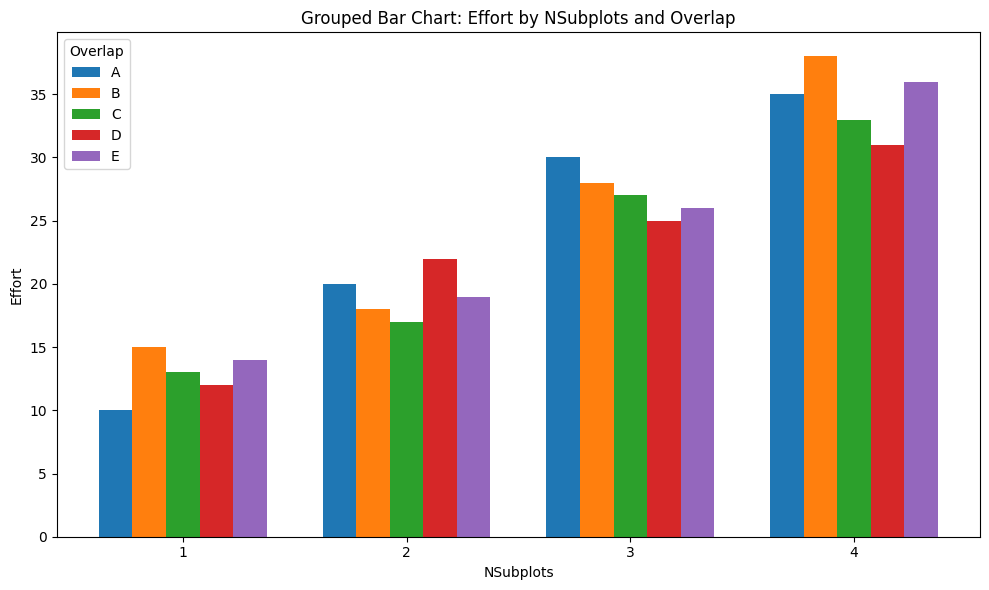

In [ ]:
sorted_data


# Pivot the DataFrame to get Overlap as columns
pivot_df = sorted_data.pivot(index='NSubplots', columns='Overlap', values='EffortKM')

# Plotting
overlap_categories = pivot_df.columns
n_groups = len(pivot_df)
n_bars = len(overlap_categories)

bar_width = 0.15
index = np.arange(n_groups)

plt.figure(figsize=(10, 6))

for i, overlap in enumerate(overlap_categories):
    plt.bar(index + i * bar_width, pivot_df[overlap], bar_width, label=overlap)

plt.xlabel('Subplotsgit')
plt.ylabel('Effort km')
plt.xticks(index + bar_width * (n_bars - 1) / 2, pivot_df.index)
plt.legend(title='Overlap')
plt.tight_layout()
plt.show()
